## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Task (2) Dataset.csv')


In [4]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


In [8]:
df.shape

(66639, 9)

In [3]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


In [6]:
df['JamsDelay'].max()

9989.4

In [9]:
df['TravelTimeLive'].mean()

70.04845106468044

In [7]:
print(df.groupby('City').size())

City
Abudhabi    3864
Al-ain      3864
Cairo       8690
Dammam      3864
Doha        8692
Dubai       8690
Jeddah      3864
Kuwait      8691
Mecca       3864
Medina      3864
Riyadh      8692
dtype: int64


### Identify and analyze patterns in the data.

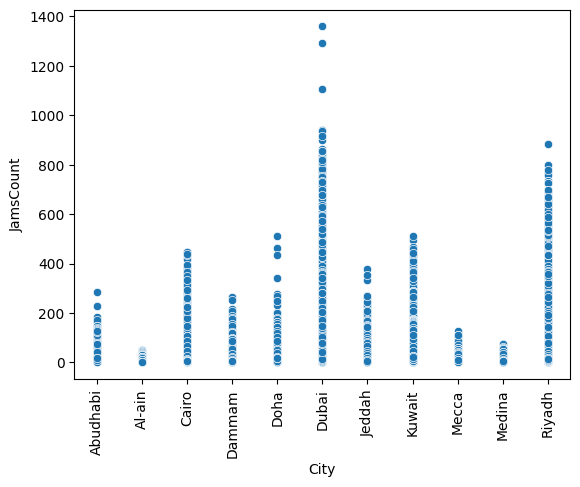

In [19]:
sns.scatterplot(x='City',y='JamsCount',data=df)
plt.xticks(rotation=90)
plt.show()

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

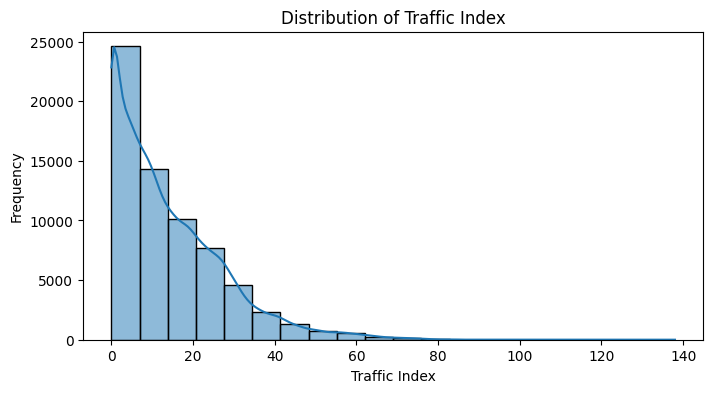

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(df['TrafficIndexLive'], bins=20, kde=True)
plt.xlabel('Traffic Index')
plt.ylabel('Frequency')
plt.title('Distribution of Traffic Index')
plt.show()

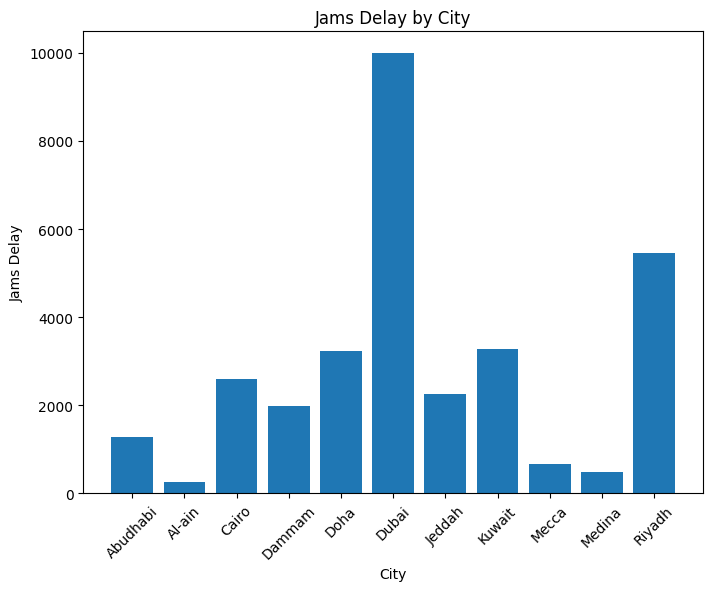

In [32]:
plt.figure(figsize=(8, 6))
plt.bar(df['City'], df['JamsDelay'])
plt.xlabel('City')
plt.ylabel('Jams Delay')
plt.title('Jams Delay by City')
plt.xticks(rotation=45)
plt.show()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


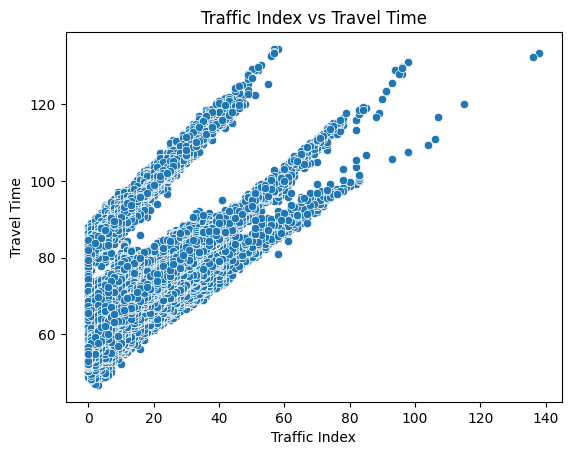

In [18]:
sns.scatterplot(x=df['TrafficIndexLive'], y=df['TravelTimeLive'])
plt.xlabel('Traffic Index')
plt.ylabel('Travel Time')
plt.title('Traffic Index vs Travel Time')
plt.show()

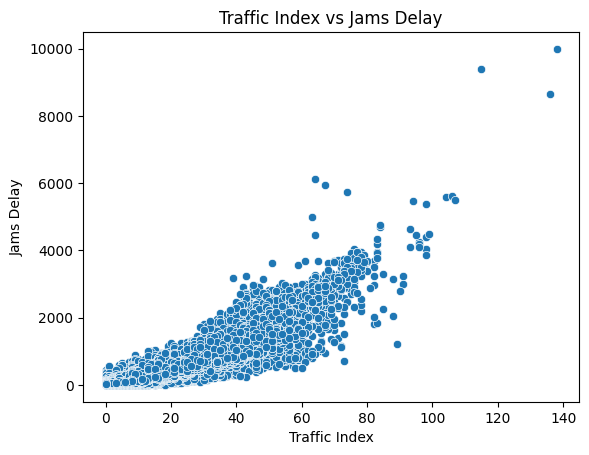

In [29]:
sns.scatterplot(x=df['TrafficIndexLive'], y=df['JamsDelay'])
plt.xlabel('Traffic Index')
plt.ylabel('Jams Delay')
plt.title('Traffic Index vs Jams Delay')
plt.show()

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


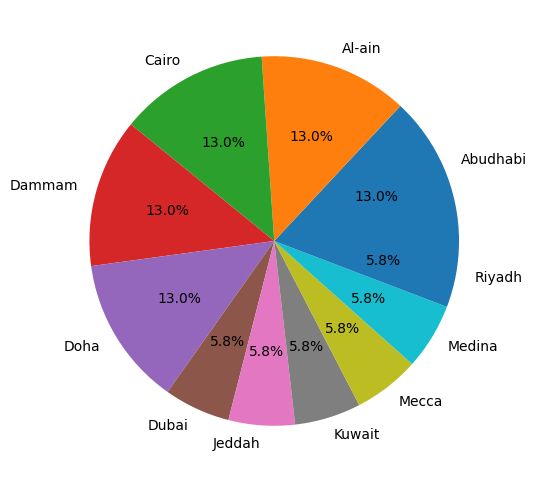

In [25]:
plt.figure(figsize=(10, 6))
plt.pie(df['City'].value_counts(), labels=df['City'].unique(), autopct='%1.1f%%')
plt.show()


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

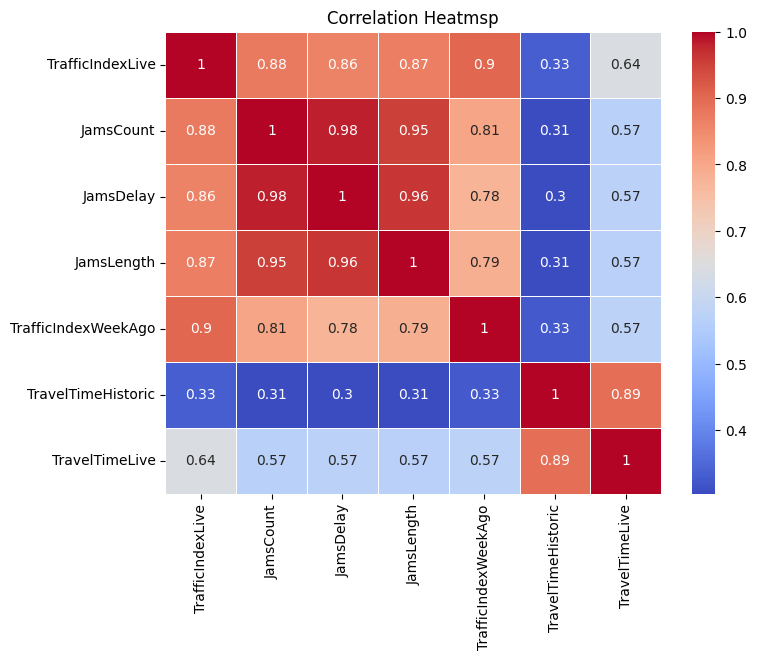

In [38]:
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.6)
plt.title('Correlation Heatmsp')
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [ ]:
# The bar chart indicates that Dubai has the highest count of traffic jams and
#  also the most significant delays due to these jams.